In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
# | eval: false
import os
from dotenv import load_dotenv

load_dotenv(dotenv_path="../../.env", override=True)

True

1. Query db to get list of X judgments 
2. Setup extraction schema
3. Apply schema to X judgments, rememeber to store time of decision for buidling a time lime
4. Gather results in a structured way and analyze rulling paths 


In [ ]:
from juddges import settings

In [ ]:
# | eval: false
settings.prepare_langchain_cache()

In [ ]:
from juddges.retrieval.mongo_term_based_search import search_judgements

In [ ]:
# | eval: false
import pandas as pd

previous_judgements_df = pd.read_pickle(
    settings.FRANKOWICZE_DATA_PATH / "extractions_df_2024-12-04.pkl"
)

In [ ]:
# Convert DataFrame to JSON format for easy loading in TypeScript
json_path = settings.FRANKOWICZE_DATA_PATH / "extractions_df.json"
previous_judgements_df.to_json(json_path, orient='records', force_ascii=False, indent=2)
print(f"DataFrame exported to {json_path} for TypeScript compatibility")

# Display sample of the DataFrame
previous_judgements_df.head(10)

,apelacja,typ_sadu,instancja_sadu,podstawa_prawna,podstawa_prawna_podana,rodzaj_roszczenia,modyfikacje_powodztwa,typ_modyfikacji,status_kredytobiorcy,wspoluczestnictwo_powodowe,...,excerpt,text,court_name,department_name,score,highlights,llm_completion,LLM,schema,language
870,Apelacja katowicka,Sąd Okręgowy,Sąd odwoławczy,Art. 58 § 1 Kodeksu cywilnego,True,O zapłatę,True,Kwoty roszczenia,Konsument,False,...,Sygn. akt I ACa 632/17 WYROK W IMIENIU RZECZYP...,Sygn. akt I ACa 632/17\n\nWYROK\nW IMIENIU RZE...,Sąd Apelacyjny w Katowicach,I Wydział Cywilny,8.513456,"[{'score': 3.6974403858184814, 'path': 'text',...","{'apelacja': 'Apelacja katowicka', 'typ_sadu':...",gpt-4o-mini-2024-07-18,"apelacja: string, description: ""Określenie ape...",polish
1303,,Sąd Okręgowy,Sąd I instancji,Art. 410 § 1 i 2 k.c. w zw. z art. 405 k.c. w ...,True,O zapłatę,True,Kwoty roszczenia,Konsument,False,...,Sygnatura akt I C 3998/17 UZASADNIENIE Powodow...,Sygnatura akt I C 3998/17\n\nUZASADNIENIE\nPow...,Sąd Rejonowy dla Warszawy-Mokotowa w Warszawie,I Wydział Cywilny,5.019351,"[{'score': 6.743025302886963, 'path': 'text', ...","{'apelacja': '', 'typ_sadu': 'Sąd Okręgowy', '...",gpt-4o-mini-2024-07-18,"apelacja: string, description: ""Określenie ape...",polish
2666,Apelacja warszawska,Sąd Apelacyjny,Sąd odwoławczy,Art. 385(1) Kodeksu cywilnego,True,O zapłatę,True,Rodzaj roszczenia,Konsument,False,...,Sygn. akt I ACa 661/21 WYROK W IMIENIU RZECZYP...,Sygn. akt I ACa 661/21\n\nWYROK\nW IMIENIU RZE...,Sąd Apelacyjnyw Warszawie,I Wydział Cywilny,6.312963,"[{'score': 7.285584449768066, 'path': 'text', ...","{'apelacja': 'Apelacja warszawska', 'typ_sadu'...",gpt-4o-mini-2024-07-18,"apelacja: string, description: ""Określenie ape...",polish
3096,Apelacja warszawska,Sąd Okręgowy,Sąd I instancji,Art. 385(1) Kodeksu cywilnego,True,O ustalenie istnienia/nieistnienia stosunku pr...,True,Rodzaj roszczenia,Konsument,False,...,Sygn. akt XXVIII C 4832/21 WYROK W IMIENIU RZE...,Sygn. akt XXVIII C 4832/21\n\nWYROK\nW IMIENIU...,None,None,6.237174,"[{'score': 4.242431640625, 'path': 'text', 'te...","{'apelacja': 'Apelacja warszawska', 'typ_sadu'...",gpt-4o-mini-2024-07-18,"apelacja: string, description: ""Określenie ape...",polish
3474,Apelacja poznańska,Sąd Okręgowy,Sąd I instancji,Art. 189 Kodeksu postępowania cywilnego,True,O ustalenie istnienia/nieistnienia stosunku pr...,True,Rodzaj roszczenia,Konsument,True,...,Sygnatura akt XII C 1104/19 WYROK W IMIENIU RZ...,Sygnatura akt XII C 1104/19\n\nWYROK\nW IMIENI...,Sąd Okręgowy w Poznaniu,XII Wydział Cywilny,7.829776,"[{'score': 15.217217445373535, 'path': 'text',...","{'apelacja': 'Apelacja poznańska', 'typ_sadu':...",gpt-4o-mini-2024-07-18,"apelacja: string, description: ""Określenie ape...",polish
3837,Apelacja warszawska,Sąd Okręgowy,Sąd I instancji,Art. 410 § 2 Kodeksu cywilnego,True,O zapłatę,True,Kwoty roszczenia,Konsument,False,...,Sygn. XXV C 2536/17 WYROK W IMIENIU RZECZYPOSP...,Sygn. XXV C 2536/17\n\nWYROK\nW IMIENIU RZECZY...,Sąd Okręgowy w Warszawie,XXV Wydział Cywilny,8.555204,"[{'score': 4.501852989196777, 'path': 'text', ...","{'apelacja': 'Apelacja warszawska', 'typ_sadu'...",gpt-4o-mini-2024-07-18,"apelacja: string, description: ""Określenie ape...",polish
4047,,Sąd Okręgowy,Sąd I instancji,Art. 385(1) Kodeksu cywilnego,True,O ustalenie istnienia/nieistnienia stosunku pr...,True,Kwoty roszczenia,Konsument,False,...,Sygn. I C 209/21 WYROK W IMIENIU RZECZYPOSPOLI...,Sygn. I C 209/21\n\nWYROK\nW IMIENIU RZECZYPOS...,Sąd Okręgowy w Słupsku,I Wydział Cywilny,5.298149,"[{'score': 13.564516067504883, 'path': 'text',...","{'apelacja': '', 'typ_sadu': 'Sąd Okręgowy', '...",gpt-4o-mini-2024-07-18,"apelacja: string, description: ""Określenie ape...",polish
102,,Sąd Okręgowy,Sąd I instancji,"Art. 476 k.c., Art. 477 § 1 k.c.",True,O zapłatę,False,,Konsument,False,...,Sygn. akt: I C 1258/12 WYROK W IMIENIU RZECZYP...,Sygn. akt:I C 1258/12\n\nWYROK\nW IMIENIU RZEC...,Sąd Okręgowy w Krakowie,I Wydział Cywilny,5.802362

In [ ]:
# | eval: false
judgements = search_judgements("kredyt we frankach", max_docs=200)

In [ ]:
# | eval: false
len(judgements)

200

In [ ]:
# | eval: false

# Get first judgment
judgment = judgements[-1]

from IPython.display import Markdown, display

# Display as markdown
md = f"""
### Judgment Details

**Signature:** {judgment['signature']}  
**Score:** {judgment['score']}

### Highlighted Excerpts
"""

for highlight in judgment["highlights"]:
    text = ""
    for segment in highlight["texts"]:
        if segment["type"] == "hit":
            text += f"**{segment['value']}**"
        else:
            text += segment["value"]

    md += f"""
---
**Score:** {highlight['score']}

{text}
"""

display(Markdown(md))


### Judgment Details

**Signature:** XXV C 2578/18  
**Score:** 6.319412708282471

### Highlighted Excerpts

---
**Score:** 7.1750969886779785

(dalej: Umowa kredytuk.40-44).

2
Podstawą zawarcia Umowy kredytu był wniosek o **kredyt** hipoteczny z 19 października 2006 roku(wniosek o **kredyt** k.121-124).

3
**We** wniosku o **kredyt** wskazana została kwota 477 000 zł jako kwota kredytu i CHF jako waluta kredytu. 

---
**Score:** 9.048182487487793

Nie istnieje zatem żadna podstawa prawna świadczenia spełnionego na rzecz banku **we** **frankach** szwajcarskich.


---
**Score:** 8.432010650634766

Ponadto spłacone **we** **frankach** kwoty nie mogą być zaliczone na poczet sumy, którą powodowie mają obowiązek zwrócić pozwanemu, ponieważ ani umowa, ani ustawa nie określają właściwego kursu po jakim należałoby przeliczyć kwoty uiszczone **we** **frankach** szwajcarskich na złote polskie.


---
**Score:** 7.19297456741333

W związku z tym żądanie zasądzenia od pozwanego na rzecz powodów kwoty **we** **frankach** szwajcarskich podlegało uwzględnieniu w oparciu oart. 410 § 1 kcw zw. zart. 405 kc.


---
**Score:** 7.4473395347595215

O odsetkach orzeczono na podstawieart. 481 kc, przyjmując za termin płatności kwoty **we** **frankach** szwajcarskich 14 dzień od doręczenia pozwanemu odpisu pozwu.



In [ ]:
# judgements_by_signature = search_judgements_by_signature("II AKa 101/99")
# len(judgements_by_signature)

In [ ]:
# judgements_by_signature[0]["score"]

In [ ]:
# for judgement in judgements_by_signature:
#     print(judgement["signature"])
#     print("-" * 100)
#     break

In [ ]:
# | eval: false
import textwrap

# When printing output
wrapped_text = textwrap.fill(
    judgements[0]["excerpt"], width=160
)  # Adjust width as needed
print(wrapped_text)

Sygn. akt I ACa 1813/14 WYROK W IMIENIU RZECZYPOSPOLITEJ POLSKIEJ Dnia 11 czerwca 2015 r. Sąd Apelacyjny w Łodzi I Wydział Cywilny w składzie: Przewodniczący:
SSA Anna Cesarz (spr.) Sędziowie: SA Tomasz Szabelski SO del. Dariusz Limiera Protokolant: stażysta Agnieszka Kralczyńska po rozpoznaniu w dniu 11 czerwca 2015
r. w Łodzi na rozprawie sprawy z powództwa M. F. przeciwko (...) Spółce Akcyjnej z siedzibą w W. o zapłatę na skutek apelacji strony pozwanej od wyroku Sądu
Okręgowego w Łodzi z dni


In [ ]:
# for judgement in judgements:
#     print(judgement["signature"])
#     print(judgement["text"])
#     print("-" * 100)

## Analysis 

In [ ]:
# | eval: false
MAX_JUDGEMENTS = 6500
judgements = search_judgements(
    "kredyt hipoteczny we frankach szwajcarskich", max_docs=MAX_JUDGEMENTS
)

In [ ]:
# | eval: false
import pandas as pd
from juddges.data_models import Judgment

df = pd.DataFrame(judgements)

# Display first few rows
df.head()

,signature,date,excerpt,text,court_name,department_name,score,highlights
0,XXIV C 833/16,2017-02-06 01:00:00.0 CET,Sygn. akt XXIV C 833/16 WYROK W IMIENIU RZECZY...,Sygn. akt XXIV C 833/16\n\nWYROK\nW IMIENIU RZ...,Sąd Okręgowy w Warszawie,XXIV Wydział Cywilny,14.265097,"[{'score': 9.083425521850586, 'path': 'text', ..."
1,VIII GC 35/16,2018-02-14 01:00:00.0 CET,Sygn. akt VIII GC 35/16 WYROK W IMIENIU RZECZY...,Sygn. akt VIII GC 35/16\n\nWYROK\nW IMIENIU RZ...,Sąd Okręgowy w Szczecinie,VIII Wydział Gospodarczy,13.993370,"[{'score': 10.399316787719727, 'path': 'text',..."
2,I ACa 420/19,2020-01-03 01:00:00.0 CET,Sygn. akt I ACa 420/19 I ACz 549/19 WYROK W IM...,Sygn. akt I ACa 420/19\nI ACz 549/19\n\nWYROK\...,Sąd Apelacyjny w Katowicach,I Wydział Cywilny,13.876929,"[{'score': 8.776700019836426, 'path': 'text', ..."
3,XXV C 579/18,2019-02-14 01:00:00.0 CET,Sygn. XXV C 579/18 WYROK W IMIENIU RZECZYPOSPO...,Sygn. XXV C 579/18\n\nWYROK\nW IMIENIU RZECZYP...,Sąd Okręgowy w Warszawie,XXV Wydział Cywilny,13.737477,"[{'score': 8.032657623291016, 'path': 'text', ..."
4,VIII GC 323/18,2018-12-12 01:00:00.0 CET,VIII GC 314/18 UZASADNIENIE Powód B. Niestanda...,VIII GC 314/18\n\nUZASADNIENIE\nPowódB.Niestan...,Sąd Okręgowy w Szczecinie,VIII Wydział Gospodarczy,13.720249,"[{'score': 8.589164733886719, 'path': 'text', ..."


In [ ]:
#| eval: false

training_signatures = set(previous_judgements_df.signature.tolist())
df = df[~df.signature.isin(training_signatures)]

In [ ]:
# | eval: false
len(df)

1396

In [ ]:
# | eval: false
# Convert date column to datetime, using mixed format and extracting just the date portion
df["date"] = pd.to_datetime(
    df["date"].str.split().str[0], format="mixed", dayfirst=True
)

# Sort by date
df = df.sort_values("date")

# Display first few rows to verify conversion
print("Date range in dataset:")
print(f"Earliest: {df['date'].min()}")
print(f"Latest: {df['date'].max()}")

Date range in dataset:
Earliest: 2010-10-11 00:00:00
Latest: 2024-01-19 00:00:00


C:\Users\lukau\AppData\Local\Temp\ipykernel_27088\2948881041.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["date"] = pd.to_datetime(


In [ ]:
from juddges.case_law_trends.constants import DZIUBAK_JUDGMENT_DATE

In [ ]:
# | eval: false
from juddges.prompts.information_extraction import prepare_information_extraction_chain
from juddges.llms import GPT_4o_MINI_2024_07_18, GPT_4o_2024_08_06
from juddges.prompts.information_extraction import SWISS_FRANC_LOAN_SCHEMA

MODEL_NAME = GPT_4o_MINI_2024_07_18
LANGUAGE = "polish"

chain = prepare_information_extraction_chain(model_name=MODEL_NAME)

sample_extraction = chain.invoke(
    {
        "TEXT": judgements[0]["text"],
        "SCHEMA": SWISS_FRANC_LOAN_SCHEMA,
        "LANGUAGE": LANGUAGE,
    }
)
sample_extraction

{'apelacja': 'Apelacja warszawska',
 'typ_sadu': 'Sąd Okręgowy',
 'instancja_sadu': 'Sąd I instancji',
 'podstawa_prawna': 'Art. 359 Kodeksu cywilnego',
 'podstawa_prawna_podana': True,
 'rodzaj_roszczenia': 'O zapłatę',
 'modyfikacje_powodztwa': False,
 'typ_modyfikacji': '',
 'status_kredytobiorcy': 'Konsument',
 'wspoluczestnictwo_powodowe': False,
 'typ_wspoluczestnictwa': '',
 'rola_pozwanego': 'Strona umowy',
 'wczesniejsze_skargi_do_rzecznika': False,
 'umowa_kredytowa': 'Zawarta bezpośrednio w banku',
 'klauzula_niedozwolona': True,
 'wpisana_do_rejestru_uokik': True,
 'waluta_splaty': 'CHF',
 'aneks_do_umowy': False,
 'data_aneksu': '',
 'przedmiot_aneksu': '',
 'status_splaty_kredytu': False,
 'data_wyroku': '2017-02-06',
 'rozstrzygniecie_sadu': 'Zasądzenie solidarnie od pozwanych',
 'typ_rozstrzygniecia': 'Uwzględnienie powództwa w całości',
 'sesja_sadowa': 'Rozprawa',
 'dowody': ['Przesłuchanie stron'],
 'oswiadczenie_niewaznosci': False,
 'odwolanie_do_sn': False,
 'odwo

In [ ]:
# | eval: false
from tqdm.notebook import tqdm

# Process all judgments in batches of 10
batch_size = 50
batches = [df.iloc[i : i + batch_size] for i in range(0, len(df), batch_size)]

all_extractions = []
for batch in tqdm(batches, desc="Processing judgments"):
    batch_inputs = [
        {"TEXT": row["text"][:150_000], "SCHEMA": SWISS_FRANC_LOAN_SCHEMA, "LANGUAGE": "polish"}
        for _, row in batch.iterrows()
    ]

    batch_results = chain.batch(batch_inputs)

    # Combine extraction results with judgment metadata
    for result, (_, row) in zip(batch_results, batch.iterrows()):
        result.update(
            {
                "signature": row["signature"],
                "date": row["date"],
                "excerpt": row["excerpt"],
                "text": row["text"],
                "court_name": row["court_name"],
                "department_name": row["department_name"],
                "score": row["score"],
                "highlights": row["highlights"],
                "llm_completion": result,
            }
        )
        all_extractions.append(result)

# Convert extractions to DataFrame for analysis
extractions_df = pd.DataFrame(all_extractions)
print(f"Processed {len(extractions_df)} judgments with metadata")

Processing judgments:   0%|          | 0/28 [00:00<?, ?it/s]

Processed 1396 judgments with metadata


In [ ]:
# | eval: false
extractions_df["LLM"] = MODEL_NAME
extractions_df["schema"] = SWISS_FRANC_LOAN_SCHEMA
extractions_df["language"] = LANGUAGE

In [ ]:
# extractions_df = extractions_df[extractions_df["sprawa_frankowiczów"] == True]

In [ ]:
# | eval: false
settings.FRANKOWICZE_DATA_PATH.mkdir(parents=True, exist_ok=True)

current_date = pd.Timestamp.now().strftime("%Y-%m-%d")
extractions_df.to_pickle(
    settings.FRANKOWICZE_DATA_PATH / f"extractions_df_{current_date}_test.pkl"
)

In [ ]:
# | eval: false
extractions_df.sample(10)

,apelacja,typ_sadu,instancja_sadu,podstawa_prawna,podstawa_prawna_podana,rodzaj_roszczenia,modyfikacje_powodztwa,typ_modyfikacji,status_kredytobiorcy,wspoluczestnictwo_powodowe,...,szczegoły_wyniku_sprawy,sprawa_frankowiczów,signature,date,court_name,department_name,score,LLM,schema,language
587,Apelacja poznańska,Sąd Okręgowy,Sąd odwoławczy,Art. 385 KPC,True,O zapłatę,False,,Konsument,False,...,"Apelacja została oddalona, umowa uznana za nie...",False,XV Ca 340/21,2021-12-01,Sąd Okręgowy w Poznaniu,XV Wydział Cywilny Odwoławczy,10.985828,gpt-4o-mini-2024-07-18,"apelacja: string, description: ""Określenie ape...",polish
993,,Sąd Okręgowy,Sąd I instancji,Art. 189 k.p.c.,True,O ustalenie istnienia/nieistnienia stosunku pr...,True,Kwoty roszczenia,Konsument,False,...,"Umowa uznana za nieważną, zasądzenie zwrotu kw...",True,I C 513/22,2023-12-28,Sąd Okręgowy w Sieradzu,I Wydział Cywilny,10.075808,gpt-4o-mini-2024-07-18,"apelacja: string, description: ""Określenie ape...",polish
992,,Sąd Okręgowy,Sąd I instancji,Art. 58 § 1 k.c. w zw. z art. 69 prawa bankowego,True,O ustalenie istnienia/nieistnienia stosunku pr...,True,Rodzaj roszczenia,Konsument,False,...,"Umowa uznana za nieważną, zasądzenie zwrotu kwot",True,I C 429/23,2023-12-22,Sąd Okręgowy w Sieradzu,I Wydział Cywilny,9.105413,gpt-4o-mini-2024-07-18,"apelacja: string, description: ""Określenie ape...",polish
219,Apelacja warszawska,Sąd Okręgowy,Sąd I instancji,Art. 69 ust. 1 ustawy Prawo bankowe,True,O zapłatę,True,Kwoty roszczenia,Konsument,False,...,"Kredytobiorca wygrał, umowa uznana za nieważną",True,I C 1267/17,2018-11-23,Sąd Okręgowy w Warszawie,I Wydział Cywilny,11.729324,gpt-4o-mini-2024-07-18,"apelacja: string, description: ""Określenie ape...",polish
837,Apelacja warszawska,Sąd Okręgowy,Sąd odwoławczy,Art. 385(1) Kodeksu cywilnego,True,O ustalenie istnienia/nieistnienia stosunku pr...,True,Rodzaj roszczenia,Konsument,False,...,Umowa uznana za ważną,True,XXV C 602/22,2022-10-19,Sąd Okręgowy w Warszawie,XXV Wydział Cywilny,9.269499,gpt-4o-mini-2024-07-18,"apelacja: string, description: ""Określenie ape...",polish
336,Apelacja warszawska,Sąd Okręgowy,Sąd odwoławczy,Art. 385(1) Kodeksu cywilnego,True,O zapłatę,True,Kwoty roszczenia,Konsument,False,...,"Powodowie przegrali sprawę, umowa uznana za ważną",True,I ACa 196/19,2019-12-30,Sąd Apelacyjnyw Warszawie,I Wydział Cywilny,9.692116,gpt-4o-mini-2024-07-18,"apelacja: string, description: ""Określenie ape...",polish
338,Apelacja gdańska,Sąd Apelacyjny,Sąd odwoławczy,Art. 385 Kodeksu postępowania cywilnego,True,O zapłatę,True,Kwoty roszczenia,Konsument,False,...,"Bank wygrał, umowa uznana za nieważną",True,I ACa 677/19,2019-12-30,Sąd Apelacyjny w Gdańsku,I Wydział Cywilny,10.211555,gpt-4o-mini-2024-07-18,"apelacja: string, description: ""Określenie ape...",polish
445,Apelacja warszawska,Sąd Okręgowy,Sąd I instancji,"Art. 58 § 1 Kodeksu cywilnego, Art. 69 ust. 1 ...",True,O ustalenie istnienia/nieistnienia stosunku pr...,False,,Konsument,True,...,Umowa uznana za nieważną,True,I C 424/20,2020-12-01,Sąd Okręgowy w Gorzowie Wielkopolskim,I Wydział Cywilny,8.892204,gpt-4o-mini-2024-07-18,"apelacja: string, description: ""Określenie ape...",polish
356,Apelacja warszawska,Sąd Okręgowy,Sąd I instancji,Art. 58 § 1 Kodeksu cywilnego,True,O ustalenie istnienia/nieistnienia stosunku pr...,True,Rodzaj roszczenia,Konsument,False,...,Umowa uznana za nieważną,True,XXV C 2819/18,2020-02-05,Sąd Okręgowy w Warszawie,XXV Wydział Cywilny,11.660120,gpt-4o-mini-2024-07-18,"apelacja: string, description: ""Określenie ape...",polish
207,Apelacja poznańska,Sąd Okręgowy,Sąd odwoławczy,Art. 69 ustawy Prawo Bankowe z dnia 29 sierpni...,True,O zapłatę,True,Kwoty roszczenia,Konsument,False,...,"Kredytobiorcy nie spłacili zadłużenia, nakaz z...",True,XII C 152/18,2018-10-30,Sąd Okręgowy w Poznaniu,XII Wydział Cywilny,9.907612,gpt-4o-mini-2024-07-18,"apelacja: string, description: ""Określenie ape...",polish


In [ ]:
from juddges.case_law_trends.visualisations import (
    plot_distributions,
    plot_distributions_stacked,
)

In [ ]:
# | eval: false
extractions_df.wynik_sprawy.value_counts()

wynik_sprawy
Wygrana kredytobiorcy                         665
Wygrana banku                                 260
Częściowe uwzględnienie roszczeń obu stron     67
                                                8
Name: count, dtype: int64

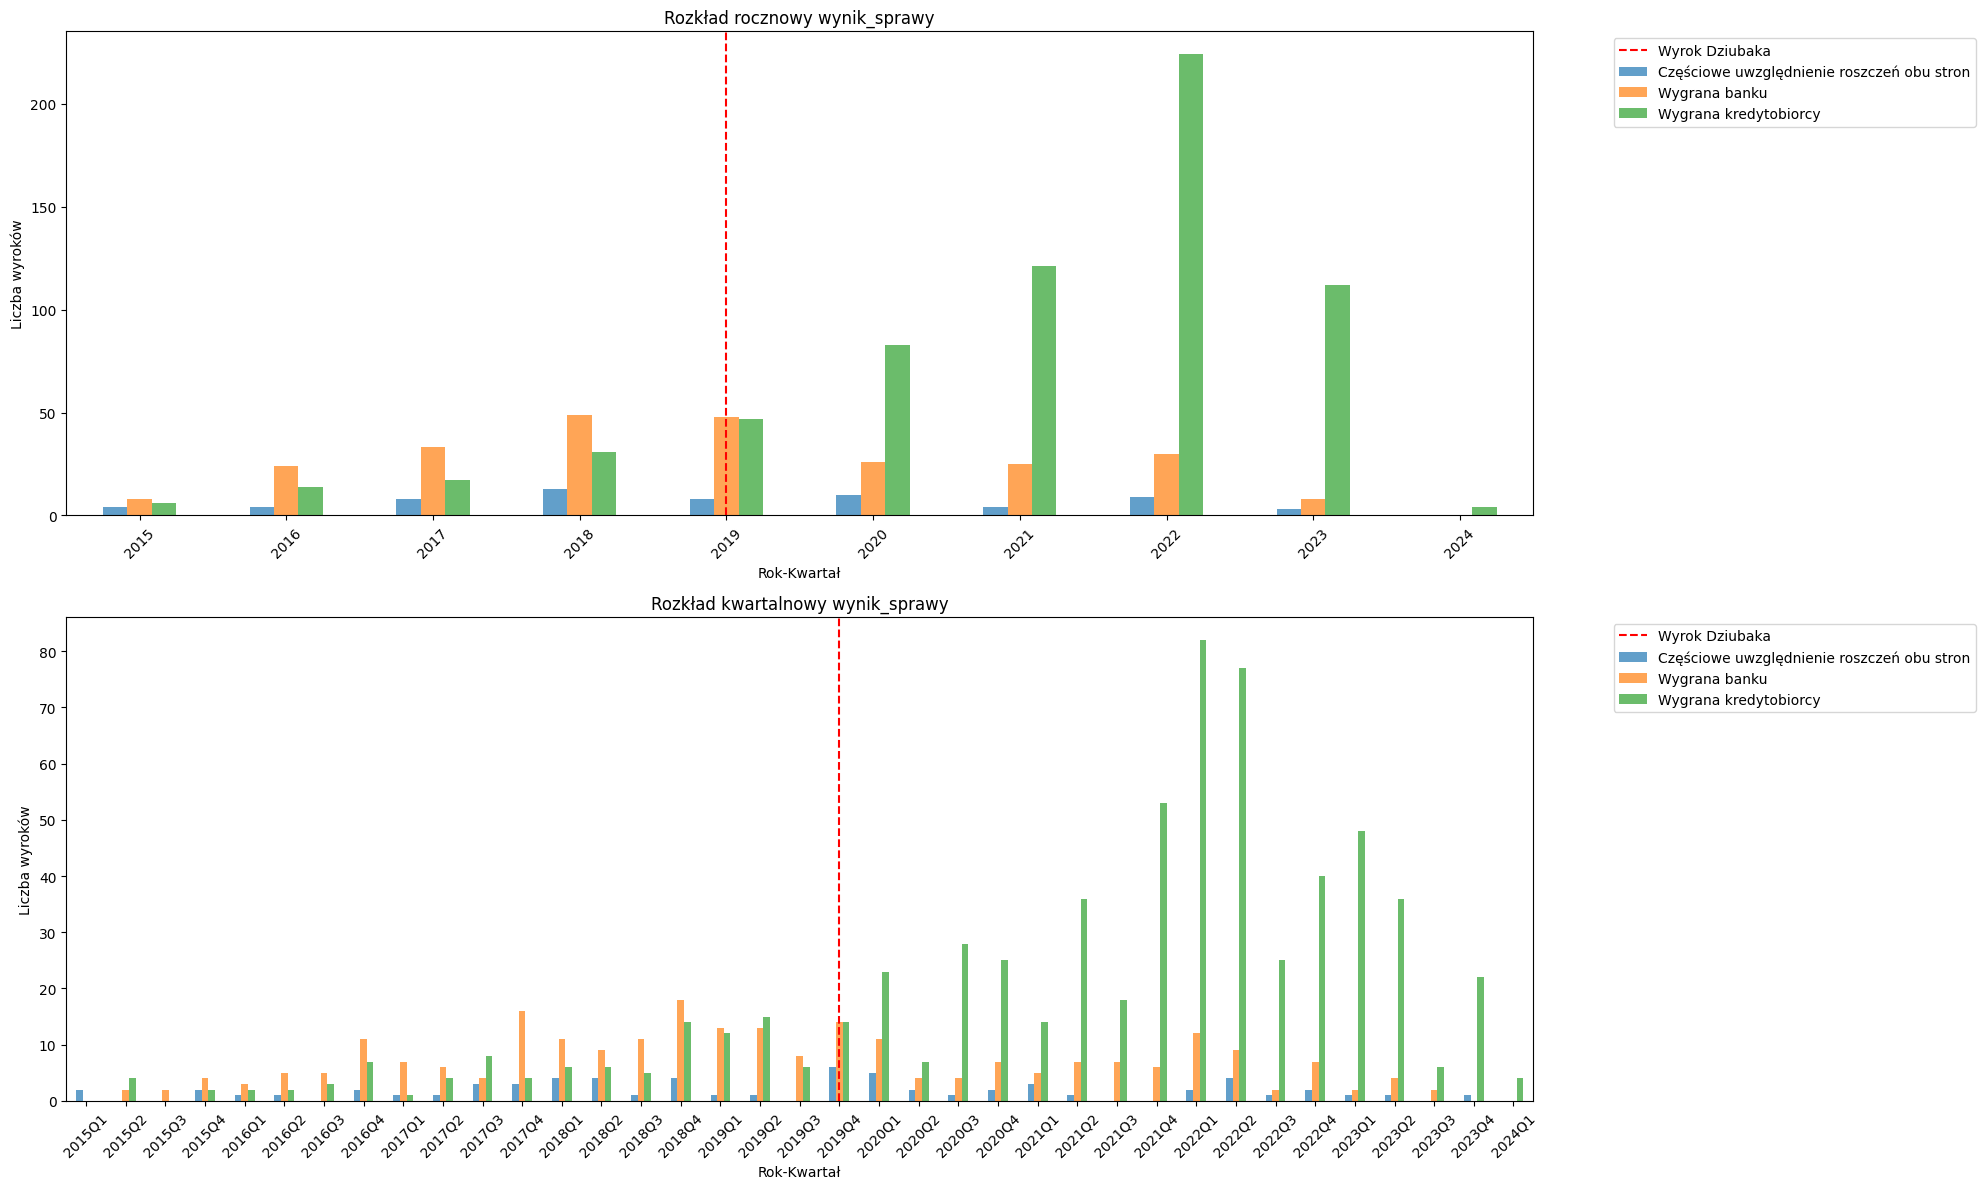

In [ ]:
# | eval: false
plot_distributions(extractions_df, "wynik_sprawy")

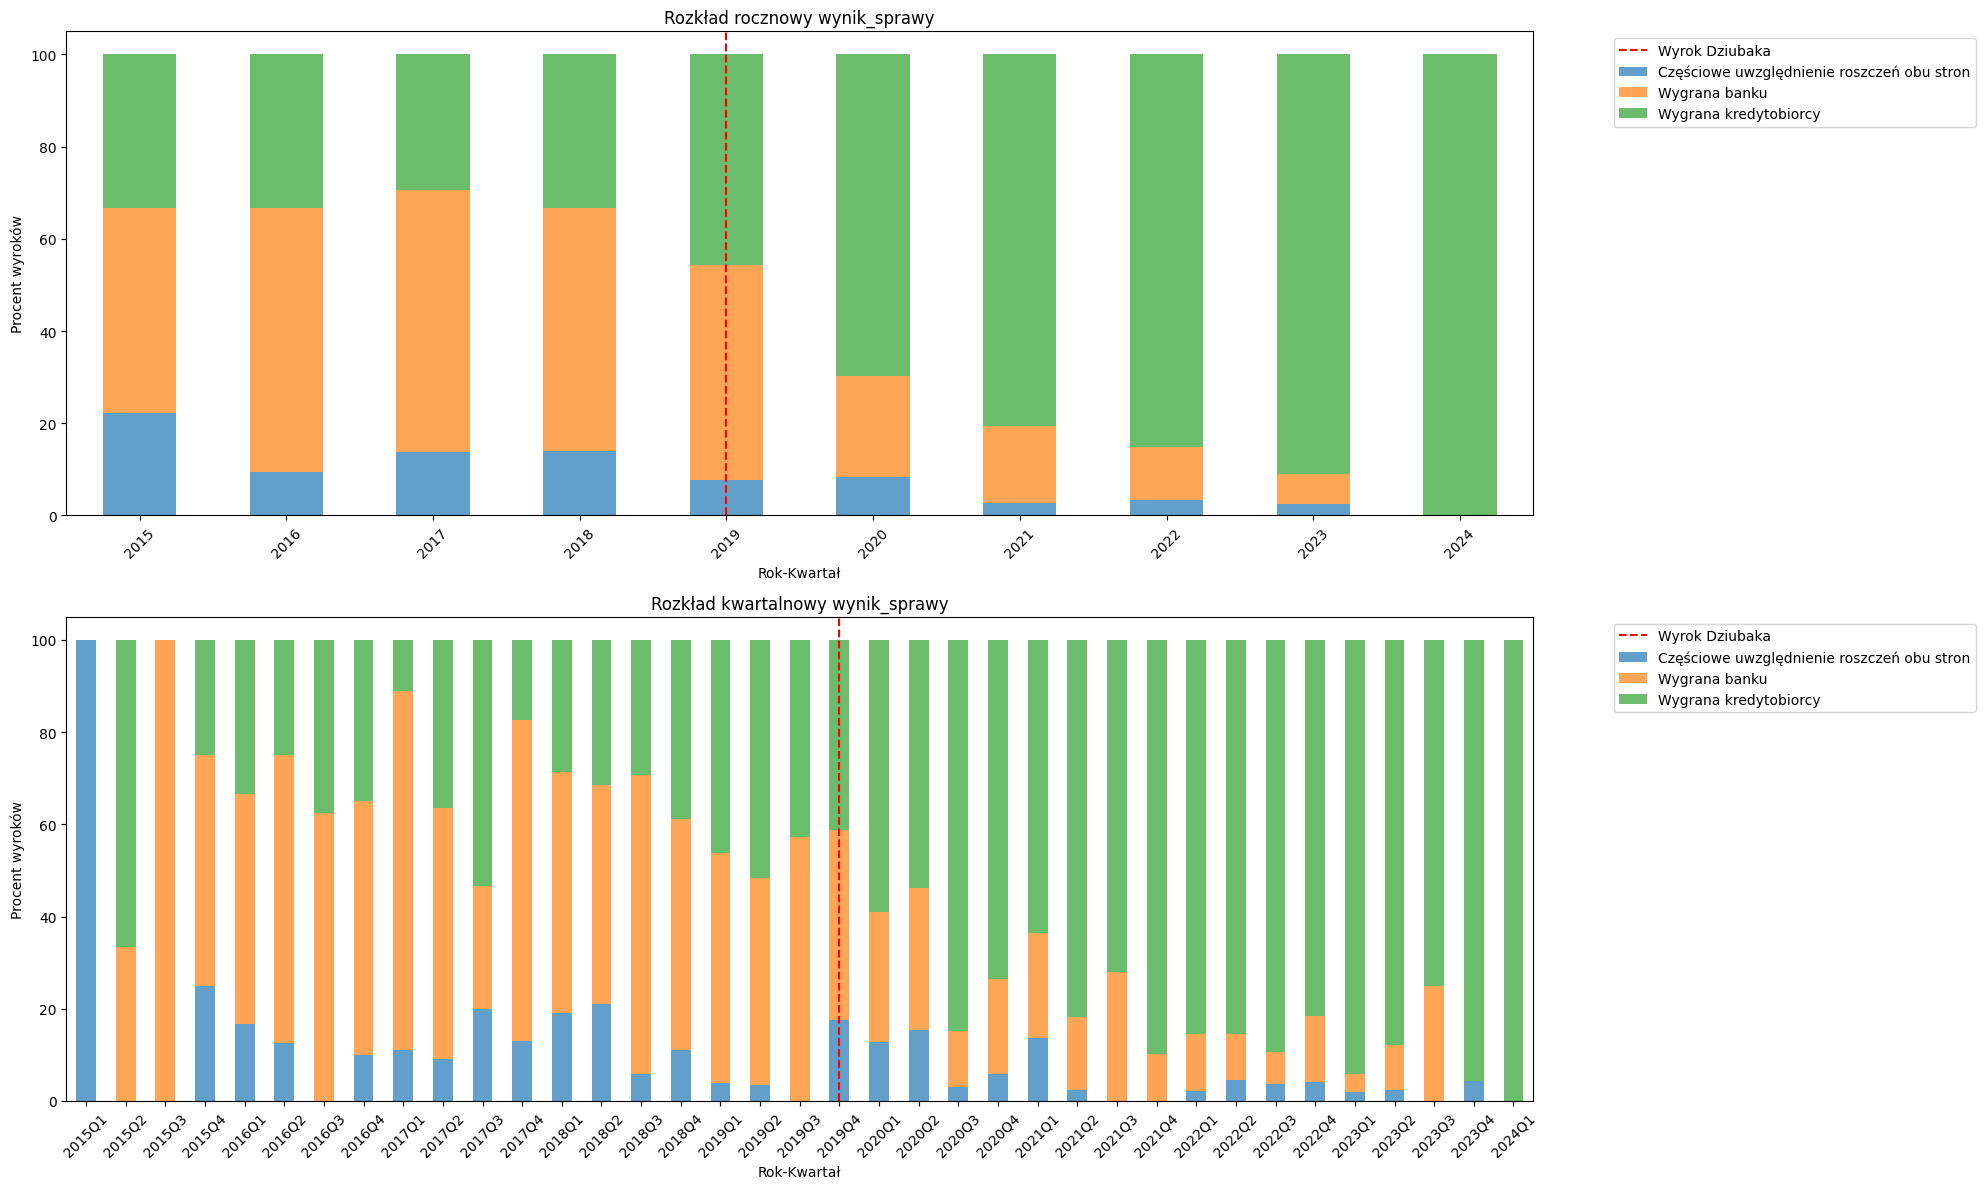

In [ ]:
# | eval: false
plot_distributions_stacked(extractions_df, "wynik_sprawy")

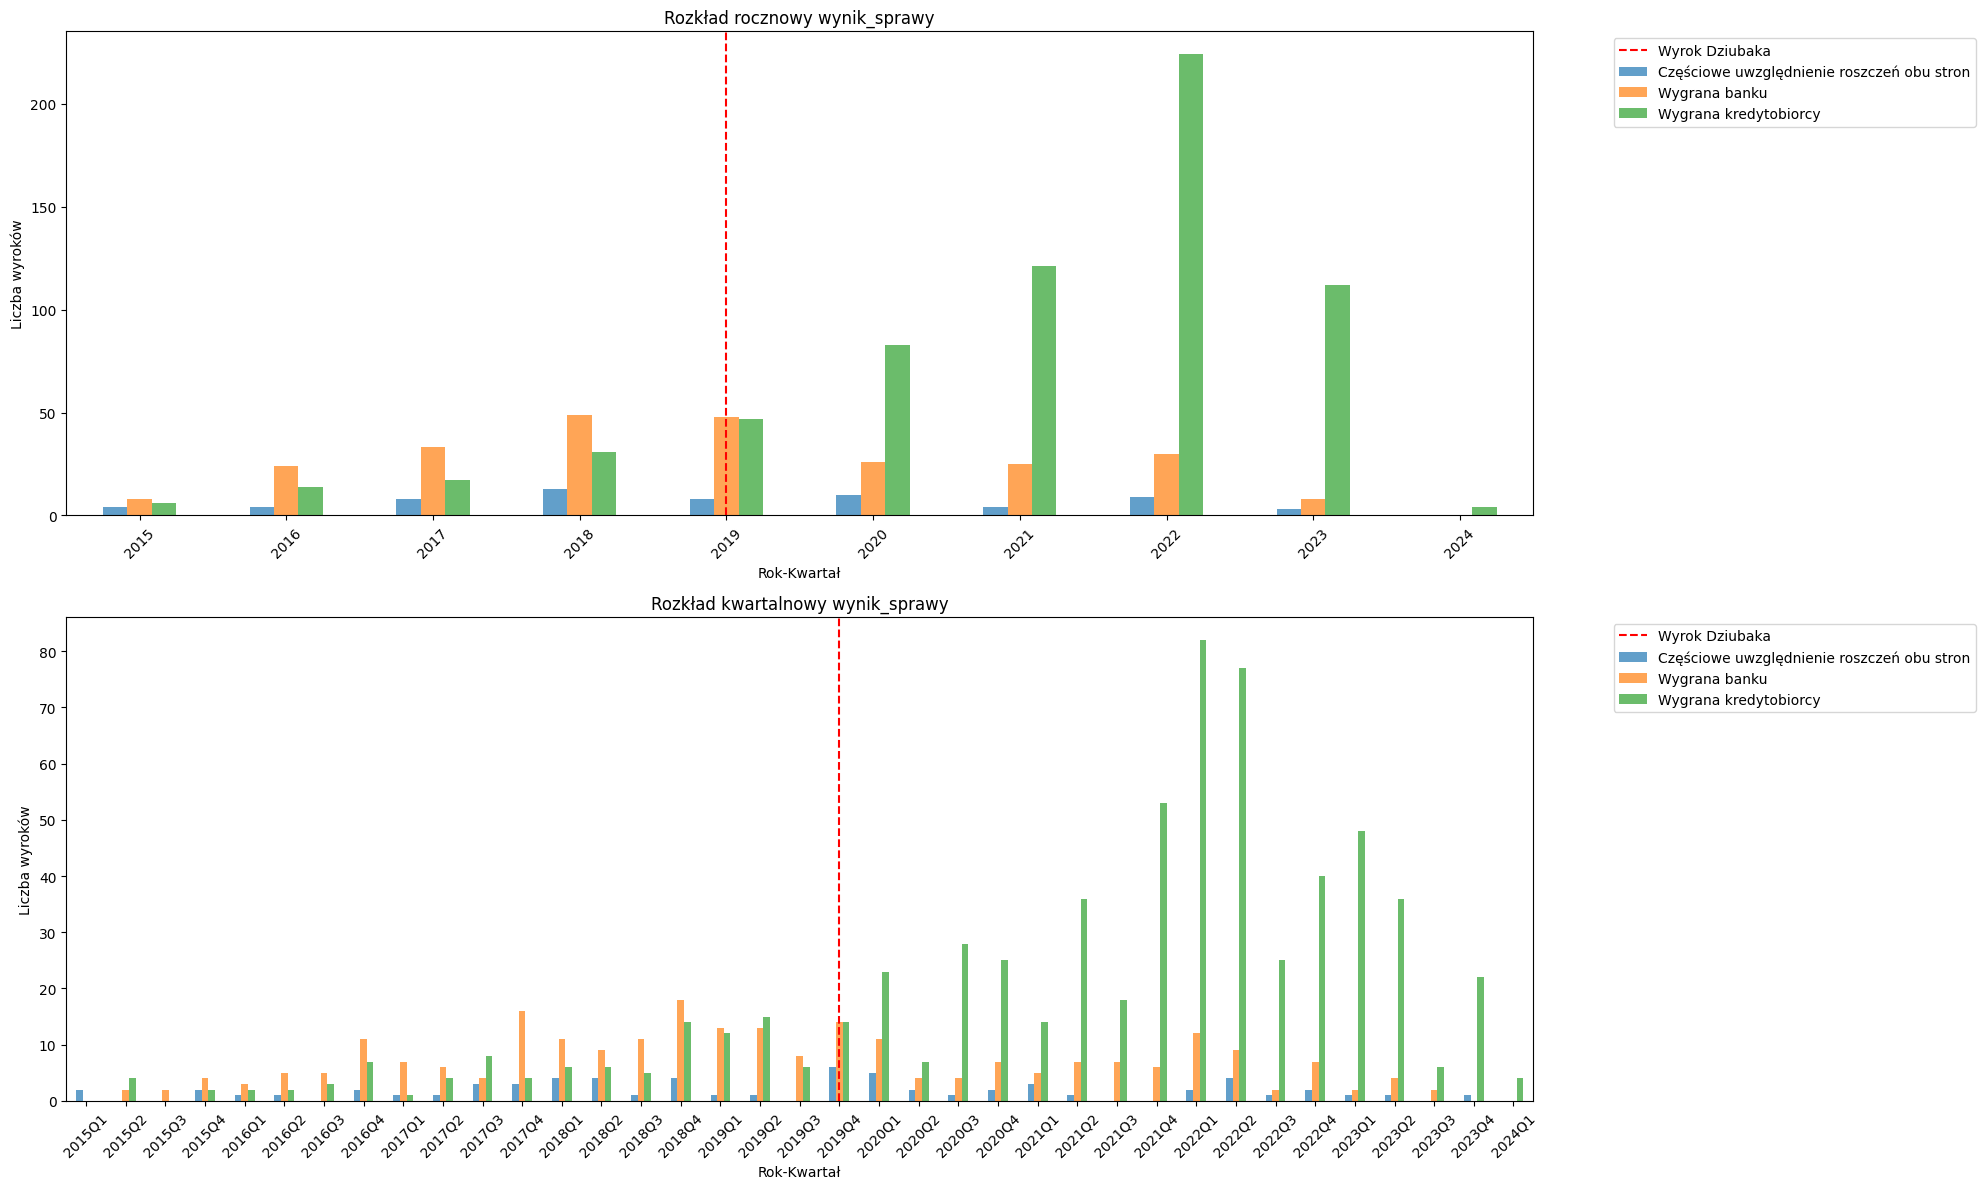

In [ ]:
# | eval: false
plot_distributions(extractions_df, "wynik_sprawy")

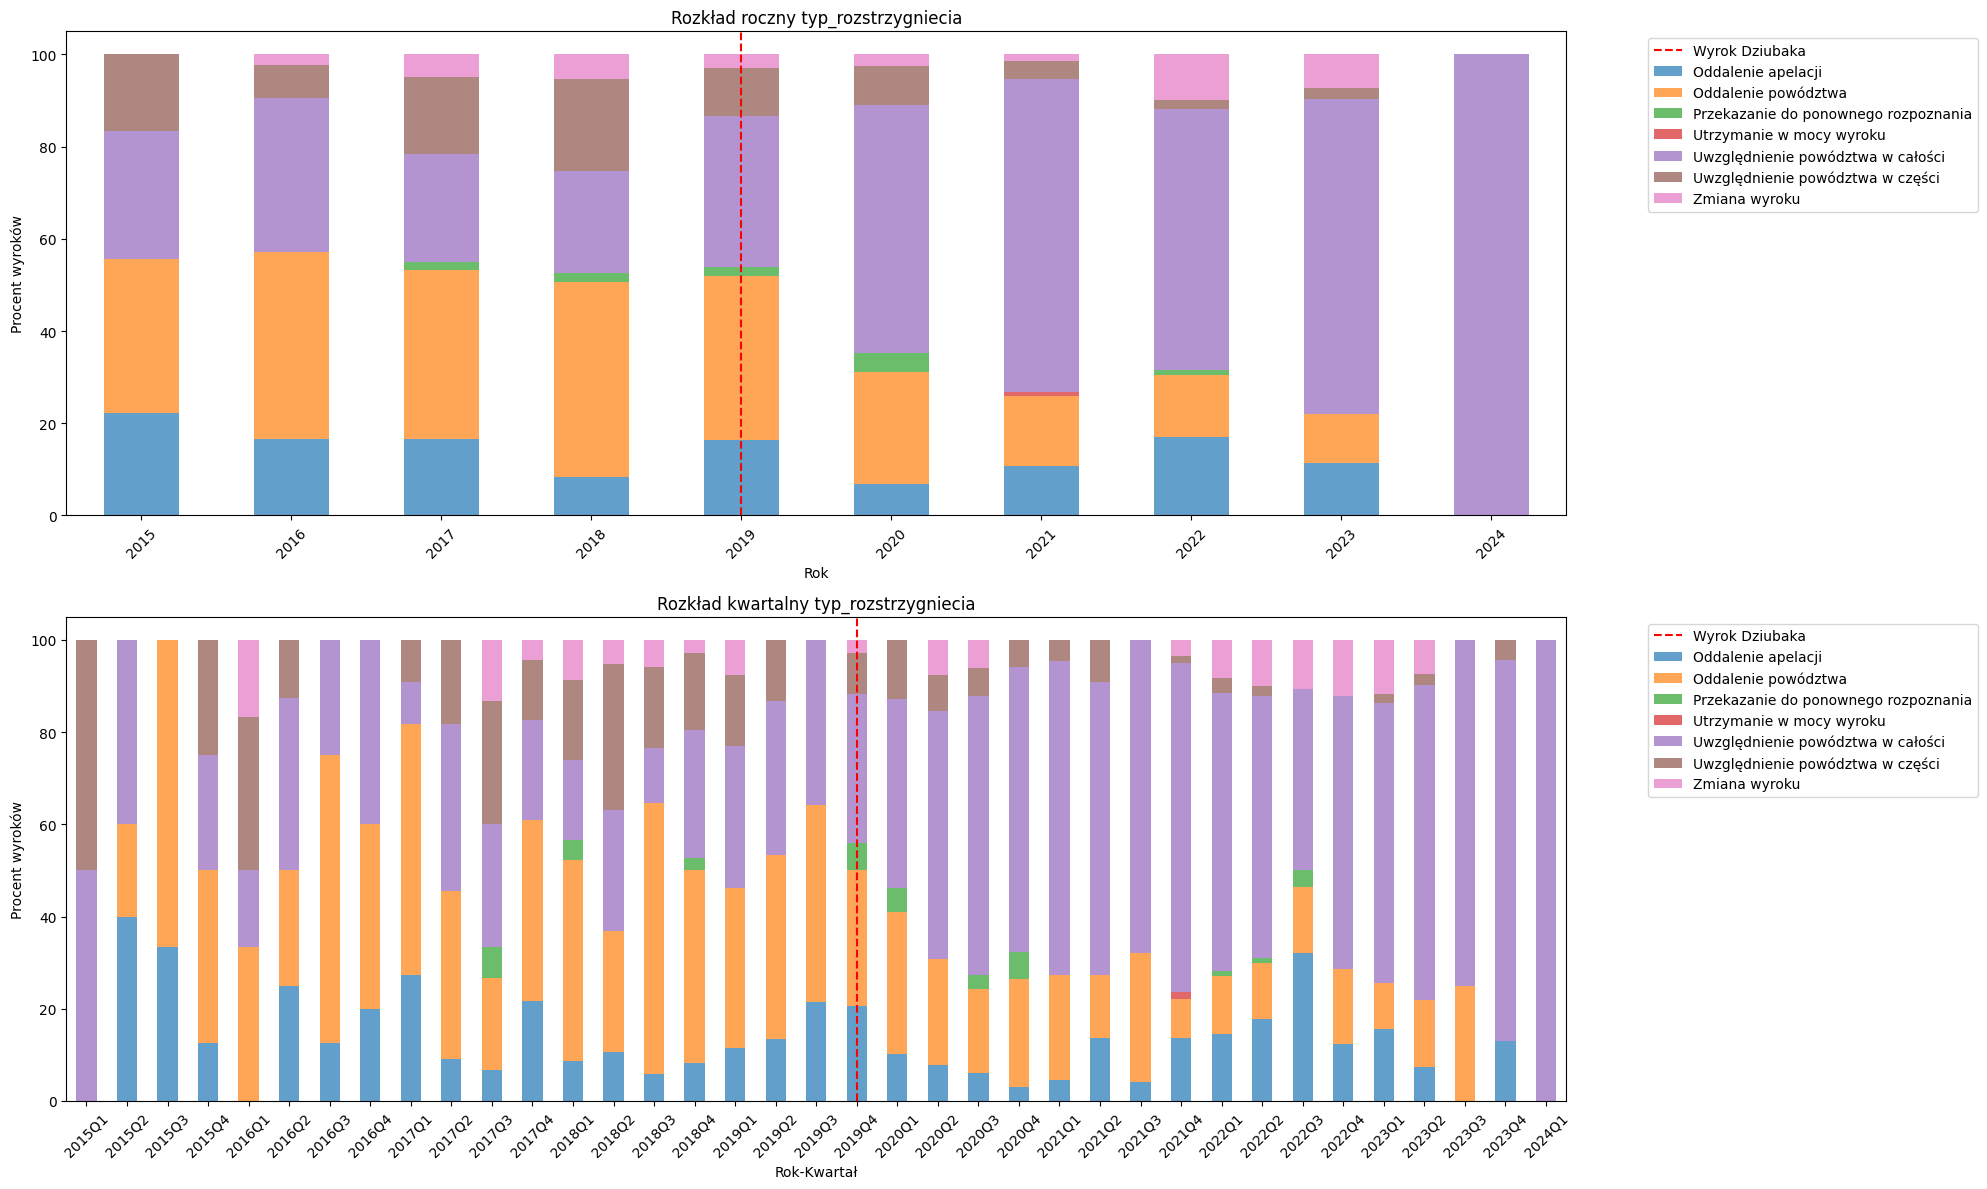

In [ ]:
# | eval: false
plot_distributions(extractions_df, "typ_rozstrzygniecia")